Using cache found in C:\Users\BineshMahato/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-12-24 Python-3.11.5 torch-2.5.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
C:\Users\BineshMahato/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


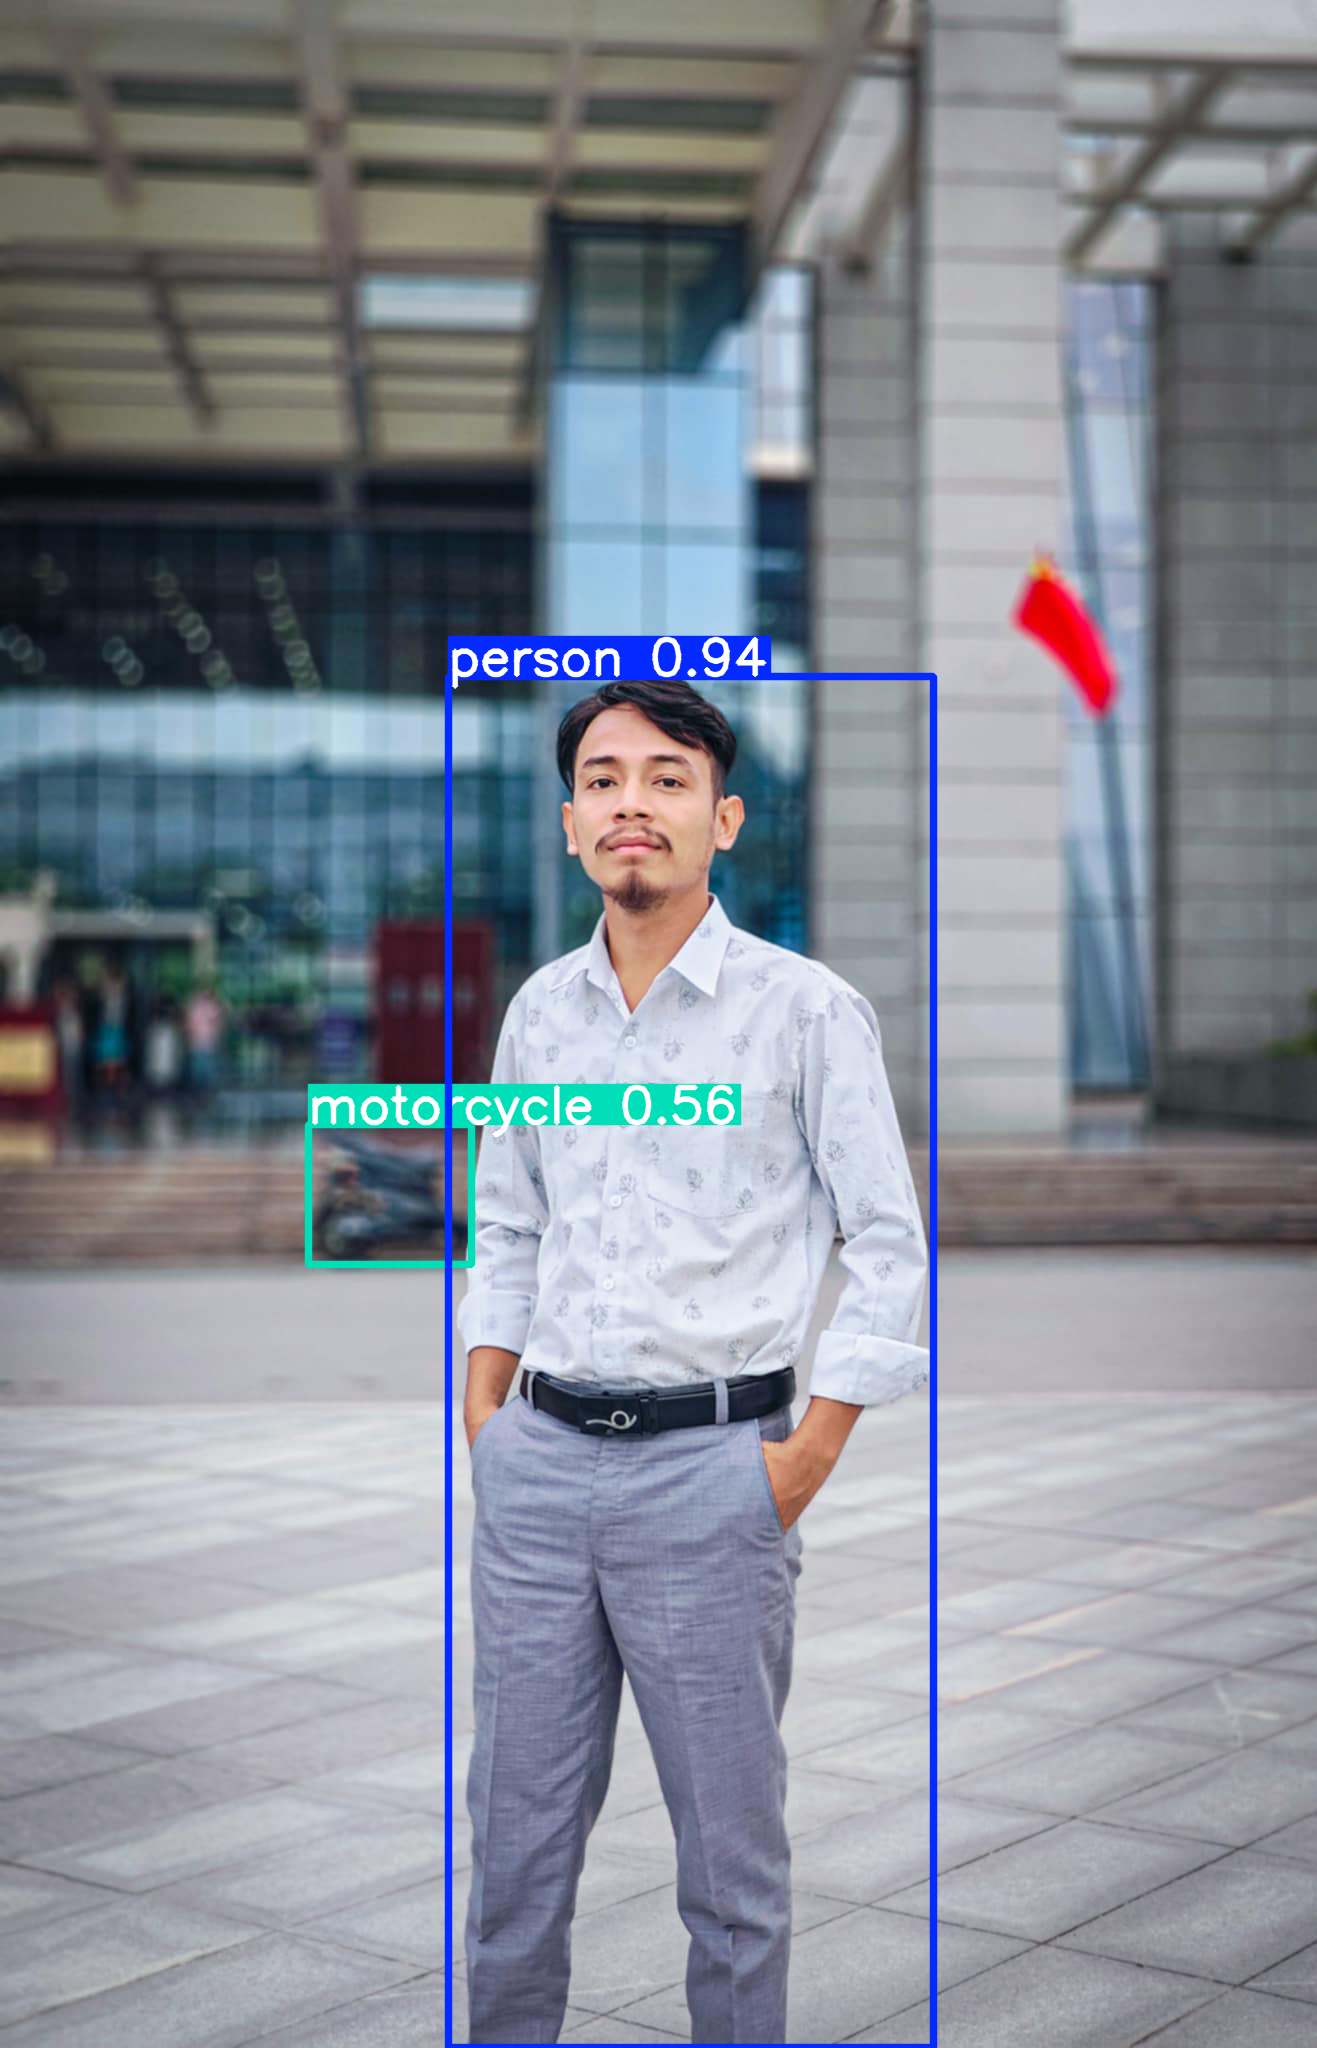

Person detected with confidence 0.94 at coordinates [tensor(448.93976), tensor(676.35388), tensor(933.08191), tensor(2047.60059)]


True

In [18]:
import torch
from matplotlib import pyplot as plt
import cv2
import numpy as np

# Load the pre-trained YOLOv5 model (you can choose 'yolov5s', 'yolov5m', 'yolov5l', 'yolov5x')
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Load an image (replace 'your_image.jpg' with your test image path)
img_path = r"C:\Users\BineshMahato\Desktop\c.jpeg"  # Use your local image path here

# Read the image
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Perform inference
results = model(img_rgb)

# Display the results inline in JupyterLab
results.show()  # This will display the image with bounding boxes around pedestrians

# You can also access the raw prediction data like labels and confidence
labels = results.names  # Class names (e.g., 'person', 'car')
predictions = results.pred[0]  # Detected predictions (bounding boxes, class ids, and confidence)

# Filter predictions to only get 'person' (class 0 for 'person' in COCO dataset)
person_predictions = predictions[predictions[:, 5] == 0]

# Print predictions
for *box, conf, cls in person_predictions:
    print(f'Person detected with confidence {conf:.2f} at coordinates {box}')

# Save the image with bounding boxes drawn on it
# Render results on the image
results.render()  # This will add bounding boxes to the image

# Assuming results is a Detections object returned by the model
results.render()  # Add bounding boxes to the image

# Get the first image in the batch
rendered_image = results.ims[0]

# Save or display the image
output_path = r"C:\Users\BineshMahato\Desktop\output.jpg"
cv2.imwrite(output_path, rendered_image)  # Save the image with bounding boxes
